✈ Flight Delay Prediction using Machine Learning
This notebook builds a machine learning model that predicts whether a flight will be delayed using flight data (flights.csv).

ML Task: Classification
Goal: Predict if a flight will be delayed (Arrival Delay > 15 minutes = Delayed)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("data/flights.csv", low_memory=False)
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [4]:
# List of columns you want to drop NA from
cols = ['ARRIVAL_DELAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME', 'DISTANCE']

# Only keep the columns that exist in the DataFrame
existing_cols = [col for col in cols if col in df.columns]

# Drop rows with missing values in those existing columns
df = df.dropna(subset=existing_cols)

# Reset index
df = df.reset_index(drop=True)


In [5]:
# Clean column names
df.columns = df.columns.str.strip().str.upper()

# Now you can safely access ARRIVAL_DELAY
df['Delayed'] = df['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)

# Check the result
print(df['Delayed'].value_counts())


Delayed
0    259146
1     77630
Name: count, dtype: int64


In [6]:
# Choosing relevant columns as features
features = ['CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DISTANCE']
X = df[features].copy()
y = df['Delayed']


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['CARRIER'] = le.fit_transform(X['CARRIER'])
X['ORIGIN'] = le.fit_transform(X['ORIGIN'])
X['DEST'] = le.fit_transform(X['DEST'])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Drop rows with any NaN values in features or labels
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # make sure y_train matches X_train


In [10]:
from sklearn.impute import SimpleImputer

# Fill NaNs with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Choose your features and target
features = ['CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DISTANCE']
X = df[features].copy()
y = df['Delayed']

# Step 2: Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with X after dropping

# Step 3: Label encode categorical features
le = LabelEncoder()
X['CARRIER'] = le.fit_transform(X['CARRIER'])
X['ORIGIN'] = le.fit_transform(X['ORIGIN'])
X['DEST'] = le.fit_transform(X['DEST'])

# Step 4: Train-test split AFTER encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7678106688988662

Confusion Matrix:
 [[50175    19]
 [15237   274]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     50194
           1       0.94      0.02      0.03     15511

    accuracy                           0.77     65705
   macro avg       0.85      0.51      0.45     65705
weighted avg       0.81      0.77      0.67     65705



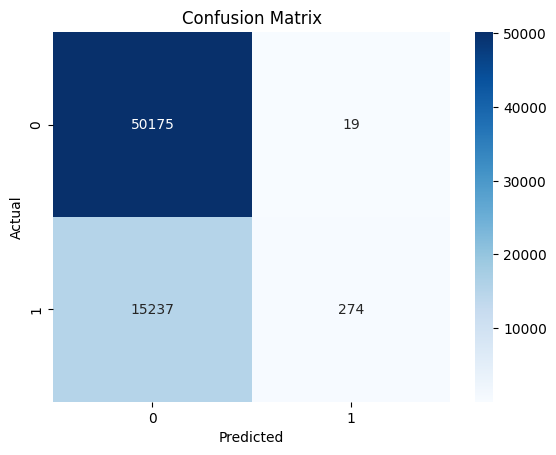

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Conclusion
We built a logistic regression model to predict flight delays.
Target variable: Delayed (1 = Delayed, 0 = Not Delayed)
Accuracy and performance metrics were evaluated.
This model can be improved with:
More features (like weather, weekday, season)
Advanced models (Random Forest, XGBoost)